# MVP | Cléo Berni | Sprint: Machine Learning & Analytics

## > Problem discussion

This dataset, sourced from Kaggle, reflects the concerns of a manager at a bank regarding the churn rate among their customer base. The manager seeks to comprehend whether a customer is likely to discontinue their services in order to proactively engage with them. **By leveraging machine learning techniques, this project aims to predict customers' likelihood of leaving the banks' services.**

### Dataset description

1. Attrition_Flag | Customer Activity
2. Customer_Age | Demographic variable - Customer's age in years
3. Gender | Demographic variable - F: Female, M: Male
4. Dependent_count | Demographic variable - Number of Dependents
5. Education_Level | Demographic variable  - Educational qualification of the account holder
6. Marital_Status | Demographic variable - Status of marrige of the account holder
7. Income_Category | Demographic variable - Annual income category of the account holder
8. Card_Category | Product variable - Type of card used
9. Months_on_book | Time of relationship
10. Total_Relationsh_Count | Total nº products held by the customer
11. Months_Inactive_12_mon | Nº of months inactive in the last 12 months
12. Contacts_Count_12_mon | Nº of contacts in the last 12 months
13. Credit_Limit | Credit limit on the credit card
14. Total_Revolving_Bal | Total revolving balance on the credit card
15. Avg_Open_To_Buy | Open to buy credit line (Average of the last 12 months)
16. Total_Amt_Chng_Q4_Q1 | Change in transaction amount (Q4 over Q1)
17. Total_Trans_Amt | Total transaction amount (last 12 months)
18. Total_Trans_Ct | Total transaction count (last 12 months)
19. Total_Ct_Chng_Q4_Q1 | Change in transaction count (Q4 over Q1)
20. Avg_Utilization_Ratio | Average Card Utilization Ratio

## 1. Import Libraries & Dataset

In [1]:
!pip install category-encoders

In [2]:
#Libraries for EDA
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from cycler import cycler
#Libraries for data processing
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.preprocessing import StandardScaler
from category_encoders import TargetEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from scipy import stats
#Libraries for model training
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
#Libraries for model evaluation
from sklearn.metrics import average_precision_score, confusion_matrix, roc_auc_score, f1_score, precision_score, recall_score

In [3]:
df = pd.read_csv(r'/content/BankChurners.csv')

* Removing columns that are not part of the dataset:

In [4]:
df = df.drop(["Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1", "Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2","CLIENTNUM"], axis = 1)

In [5]:
df.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


## 2. Data Exploration

### Dataset Analysis

In [6]:
print("The initial Churn dataset contains {} rows of data and {} features, including the target variable".format(df.shape[0],df.shape[1]))

The initial Churn dataset contains 10127 rows of data and 20 features, including the target variable


- As the dataset contains both categorical and numerical variables, encoding is required. Therefore, each column needs to be categorized accordingly.
The target variable is being separated to improve the functionality of the target encoder function.

In [7]:
categorical_vars = ['Gender','Education_Level','Marital_Status','Income_Category','Card_Category']
numerical_vars = ['Customer_Age','Dependent_count','Months_on_book','Total_Relationship_Count','Months_Inactive_12_mon','Contacts_Count_12_mon','Credit_Limit','Total_Revolving_Bal','Avg_Open_To_Buy','Total_Amt_Chng_Q4_Q1','Total_Trans_Amt','Total_Trans_Ct','Total_Ct_Chng_Q4_Q1','Avg_Utilization_Ratio']
print('The dataset consists of {} numerical features and {} categorical features.'.format(len(numerical_vars)+1,len(categorical_vars)))

The dataset consists of 15 numerical features and 5 categorical features.


- Below is some basic information about the dataset. Following the encoding process, the data will consist only of integer and floating-point types


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Attrition_Flag            10127 non-null  object 
 1   Customer_Age              10127 non-null  int64  
 2   Gender                    10127 non-null  object 
 3   Dependent_count           10127 non-null  int64  
 4   Education_Level           10127 non-null  object 
 5   Marital_Status            10127 non-null  object 
 6   Income_Category           10127 non-null  object 
 7   Card_Category             10127 non-null  object 
 8   Months_on_book            10127 non-null  int64  
 9   Total_Relationship_Count  10127 non-null  int64  
 10  Months_Inactive_12_mon    10127 non-null  int64  
 11  Contacts_Count_12_mon     10127 non-null  int64  
 12  Credit_Limit              10127 non-null  float64
 13  Total_Revolving_Bal       10127 non-null  int64  
 14  Avg_Op

- We can gain a better understanding of the categorical data using this code, especially regarding the number of categories each feature contains

In [9]:
df[categorical_vars].nunique()

Gender             2
Education_Level    7
Marital_Status     4
Income_Category    6
Card_Category      4
dtype: int64

- The dataset does not contain missing values

In [10]:
df.isna().sum()

Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

- The dataset contains no duplicate values

In [11]:
df.loc[df.duplicated()]

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio


* **The churn rate of customers using the bank's services is 16.45%.** Therefore, **we expect a model that is more accurate than 83.55%**. This also shows that this is an **imbalance dataset**.

In [12]:
canceled_customer = df[df["Attrition_Flag"] == "Attrited Customer"]
existing_customer = df[df["Attrition_Flag"] == "Existing Customer"]
canceled = canceled_customer.shape[0]
existing = existing_customer.shape[0]
canceled / (canceled+existing) *100

16.065962279055988

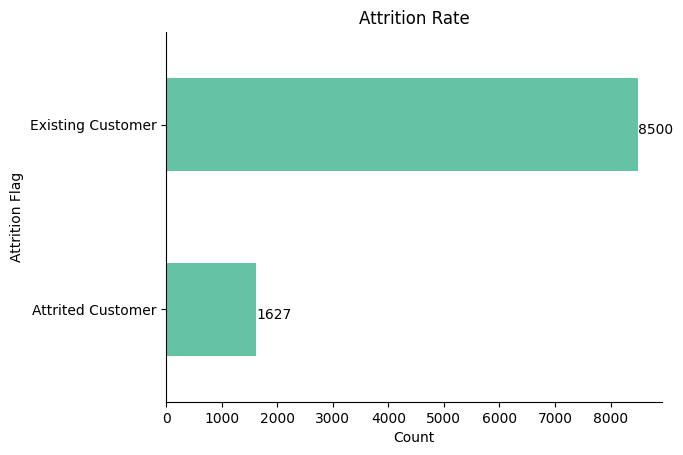

In [13]:
#Defining a pallete of colors
plt.rc('axes', prop_cycle=(cycler('color', plt.get_cmap('Set2').colors)))

#Graphic
ax = df.groupby('Attrition_Flag').size().plot(kind='barh')
ax.spines[['top', 'right']].set_visible(False)
plt.title("Attrition Rate")
ax.set_xlabel('Count')
ax.set_ylabel('Attrition Flag')
for i in ax.patches:
    ax.text(i.get_width() + 0.2, i.get_y() + 0.2, str(round((i.get_width()), 2)), fontsize=10)
plt.show()



### Analyzing the categorical features

* The analysis reveals a few notable trends within the customer base. **Females comprise a higher proportion, along with a significant presence of married couples.** Moreover, there is a **predominance of customers with graduate-level education, paired with an income category below $40k annually.** This information could help in deciding what type of service to offer when a customer has a high probability of canceling.

* Moreover, **the majority of customers opt for the Blue card type, constituting over 90% of the total base.** However, **in the Platinum and Gold categories, there is a higher rate of cancellation, reaching over 20%** Therefore, further investigation is needed to understand the underlying reasons behind this trend.

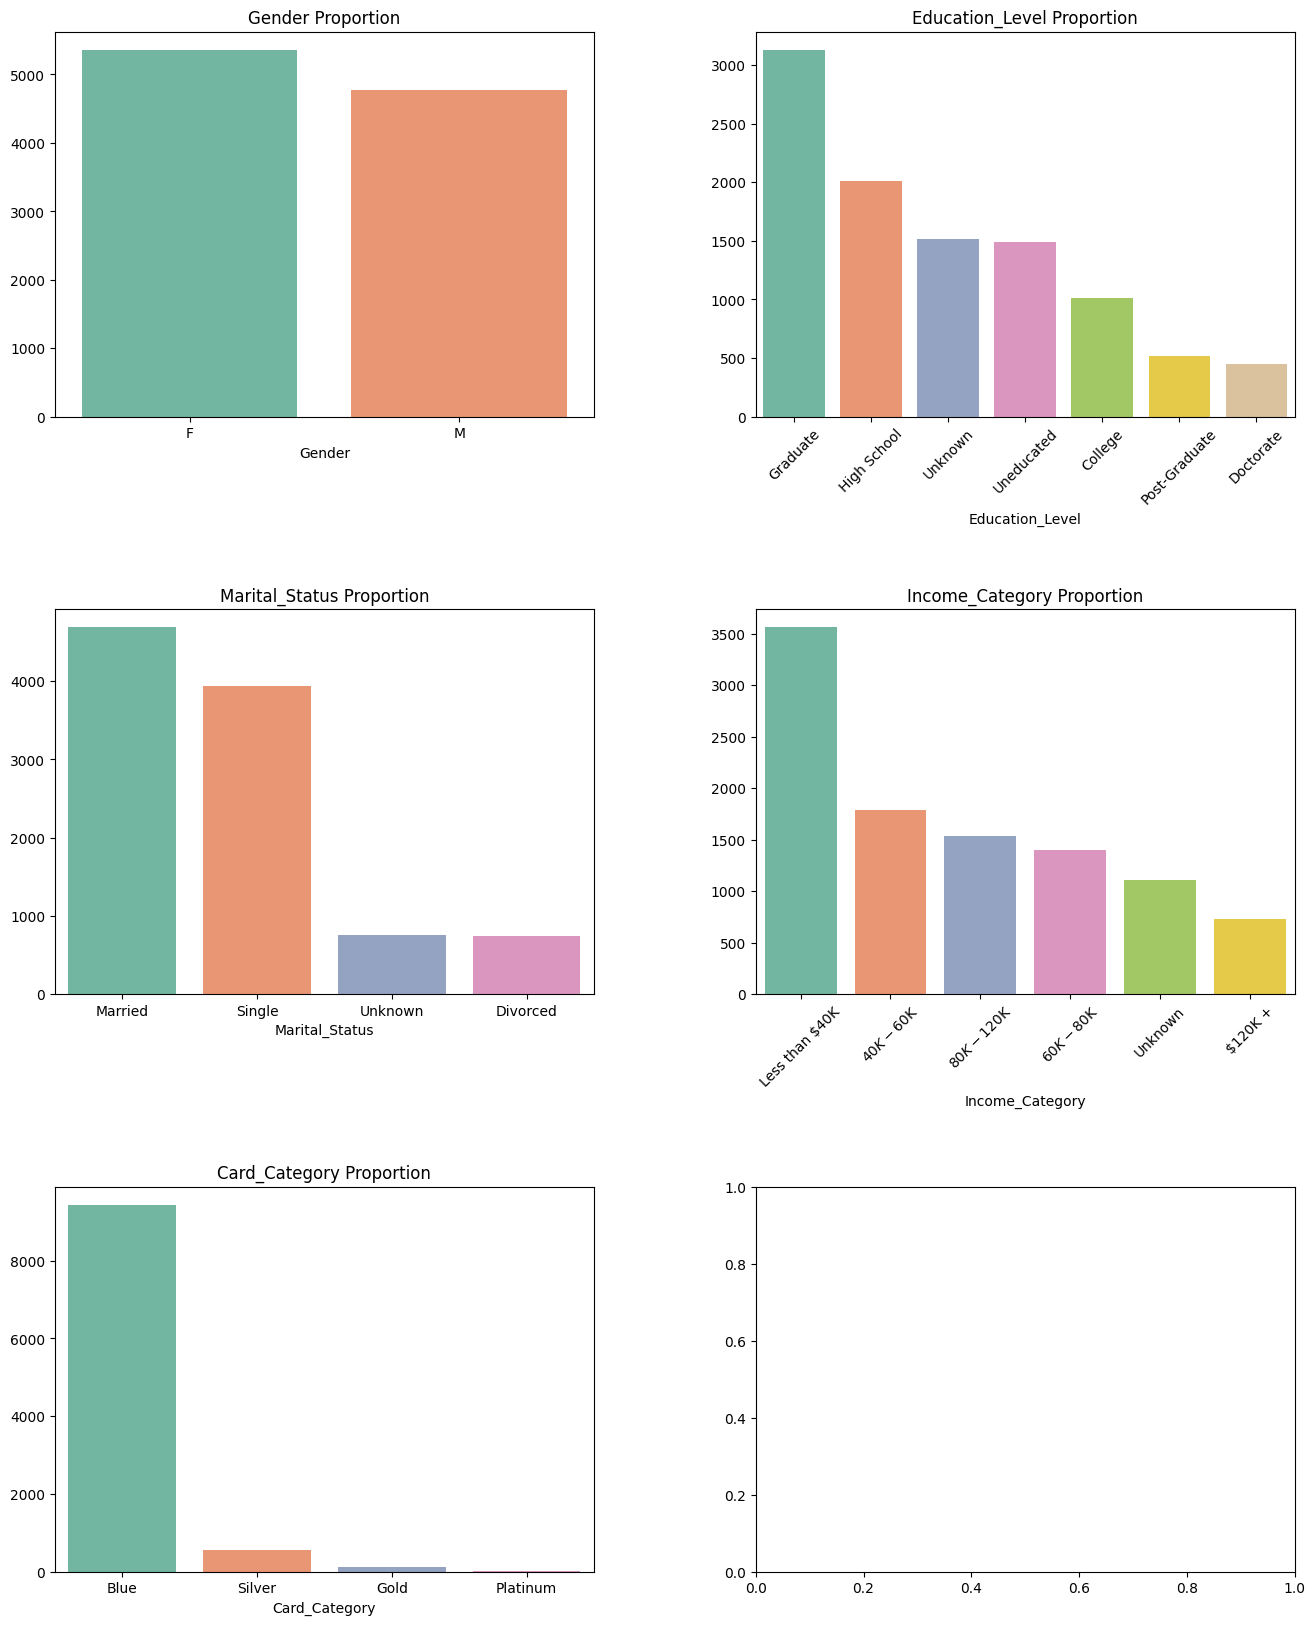

In [14]:
fig, ax = plt.subplots(3, 2,  figsize = (16, 20))
fig.subplots_adjust(hspace=0.5, wspace=0.3)

for k in range(len(categorical_vars)):
    plt.subplot(3, 2, k+1)
    feature = categorical_vars[k]
    sns.barplot(x = df[feature].value_counts().index, y = df[feature].value_counts().values, hue=df[feature].value_counts().index, palette="Set2", legend=False)
    plt.title(feature + " Proportion")
    if feature == "Education_Level" or feature == "Income_Category" :
        plt.xticks(rotation = 45)

In [15]:
card_category = df['Card_Category'].value_counts().values
total_categories = card_category.sum()
blue_category = card_category[0] / total_categories
print('The percentage of customers that choose the Blue card is: {:.2%}'.format(blue_category))

The percentage of customers that choose the Blue card is: 93.18%


In [16]:
card_cust = df[df['Attrition_Flag'] == 'Existing Customer']['Card_Category'].value_counts().values
card_cust_churn = df[df['Attrition_Flag'] == 'Attrited Customer']['Card_Category'].value_counts().values
card_category = df['Card_Category'].unique()

for i in range(len(card_cust)):
 percent = card_cust_churn[i] / (card_cust[i] + card_cust_churn[i])
 categoria = card_category[i]
 print("In the {} category, the percentage of churned customers is {:.2%}".format(categoria,percent))

In the Blue category, the percentage of churned customers is 16.10%
In the Gold category, the percentage of churned customers is 14.77%
In the Silver category, the percentage of churned customers is 18.10%
In the Platinum category, the percentage of churned customers is 25.00%


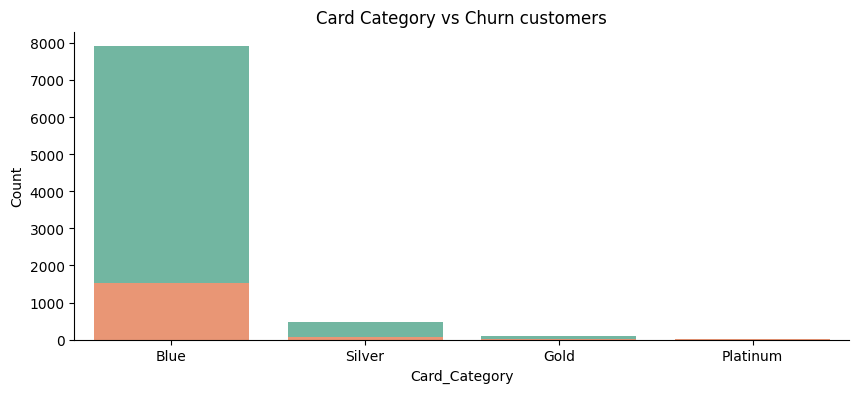

In [17]:
    plt.figure(figsize=(10, 4))
    sns.barplot(x = df[df['Attrition_Flag'] == 'Existing Customer']['Card_Category'].value_counts().index, y = df[df['Attrition_Flag'] == 'Existing Customer']['Card_Category'].value_counts().values)
    sns.barplot(x = df[df['Attrition_Flag'] == 'Attrited Customer']['Card_Category'].value_counts().index, y = df[df['Attrition_Flag'] == 'Attrited Customer']['Card_Category'].value_counts().values)
    plt.gca().spines[['top', 'right']].set_visible(False)
    plt.title("Card Category vs Churn customers")
    plt.ylabel('Count')
    plt.show()

### Analyzing the numerical features


* Analyzing the numerical features reveals that **customers tend to have more than 2 dependents**, which aligns with a higher proportion of married couples. Additionally, **they tend to possess more than 3 products from the bank within the same account**.
* On average, **customers use their card approximately 60 times per year**, but only during 10 months, **with at least 2 months of inactivity**.
* **The average customer engages with the bank more than twice a year**, indicating consistent interaction with banking services.

In [18]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Customer_Age,10127.0,46.325960,8.016814,26.0,41.000,46.000,52.000,73.000
Dependent_count,10127.0,2.346203,1.298908,0.0,1.000,2.000,3.000,5.000
Months_on_book,10127.0,35.928409,7.986416,13.0,31.000,36.000,40.000,56.000
Total_Relationship_Count,10127.0,3.812580,1.554408,1.0,3.000,4.000,5.000,6.000
Months_Inactive_12_mon,10127.0,2.341167,1.010622,0.0,2.000,2.000,3.000,6.000
Contacts_Count_12_mon,10127.0,2.455317,1.106225,0.0,2.000,2.000,3.000,6.000
Credit_Limit,10127.0,8631.953698,9088.776650,1438.3,2555.000,4549.000,11067.500,34516.000
Total_Revolving_Bal,10127.0,1162.814061,814.987335,0.0,359.000,1276.000,1784.000,2517.000
Avg_Open_To_Buy,10127.0,7469.139637,9090.685324,3.0,1324.500,3474.000,9859.000,34516.000
Total_Amt_Chng_Q4_Q1,10127.0,0.759941,0.219207,0.0,0.631,0.736,0.859,3.397


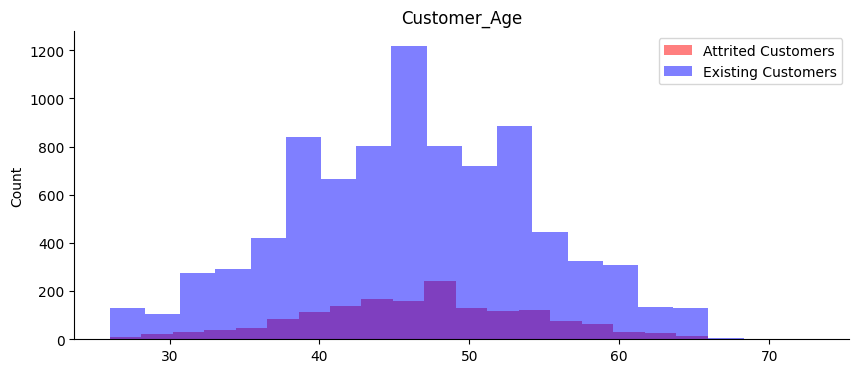

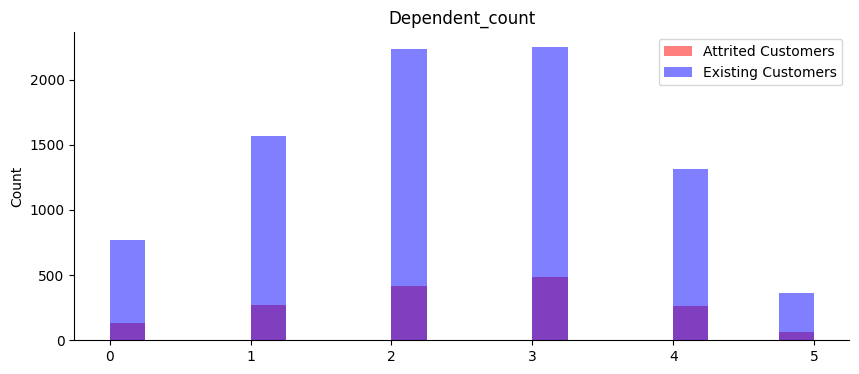

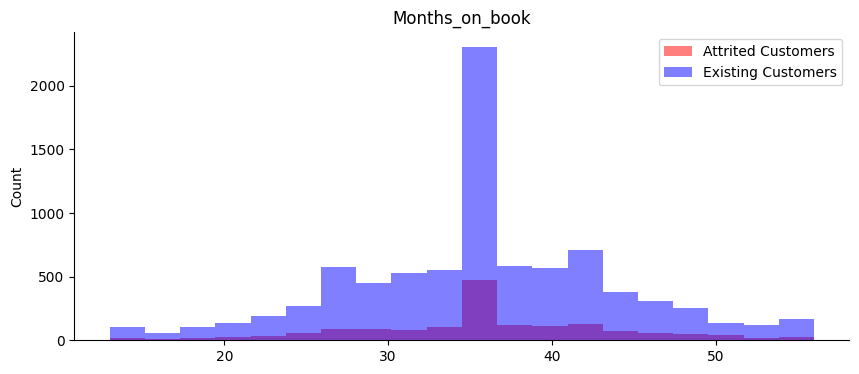

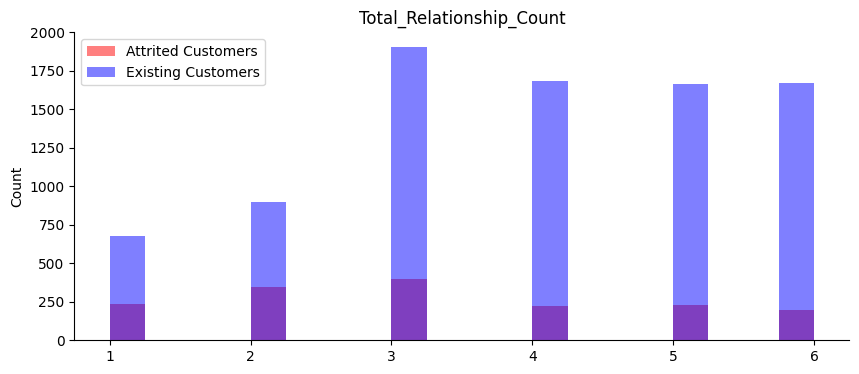

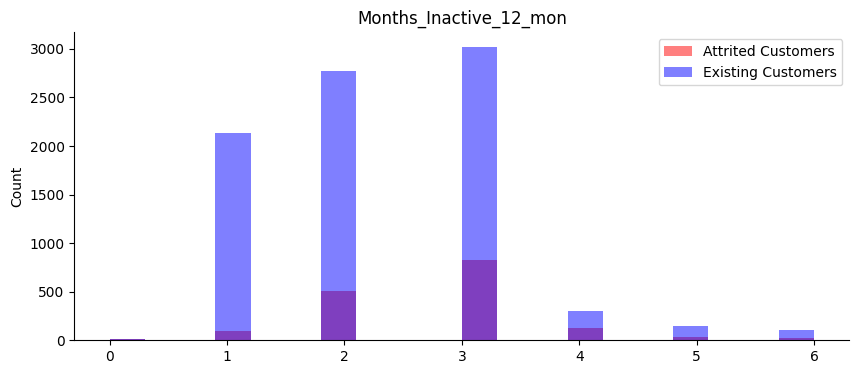

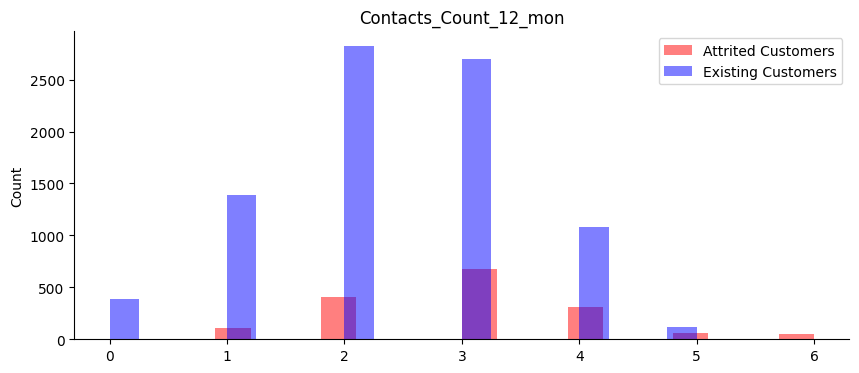

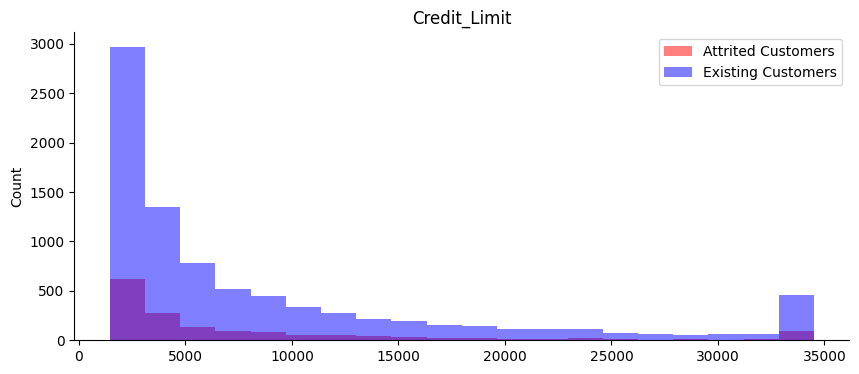

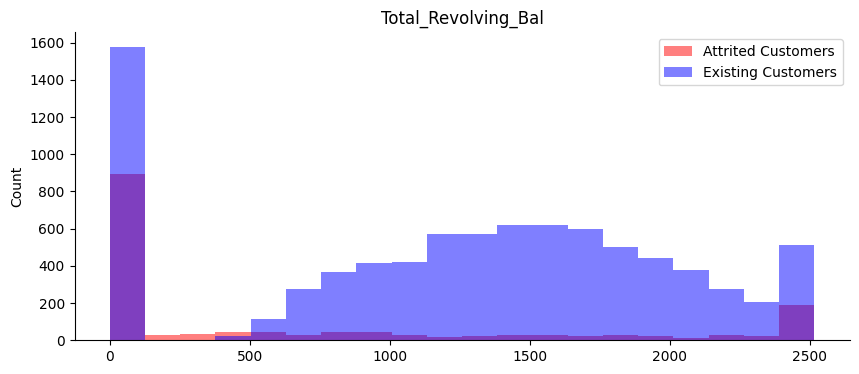

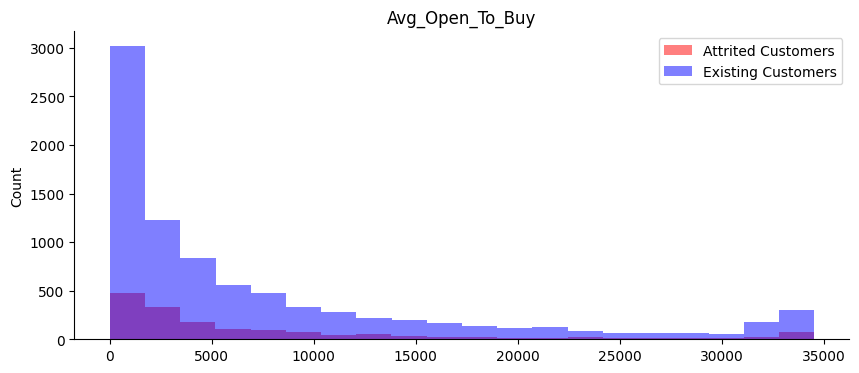

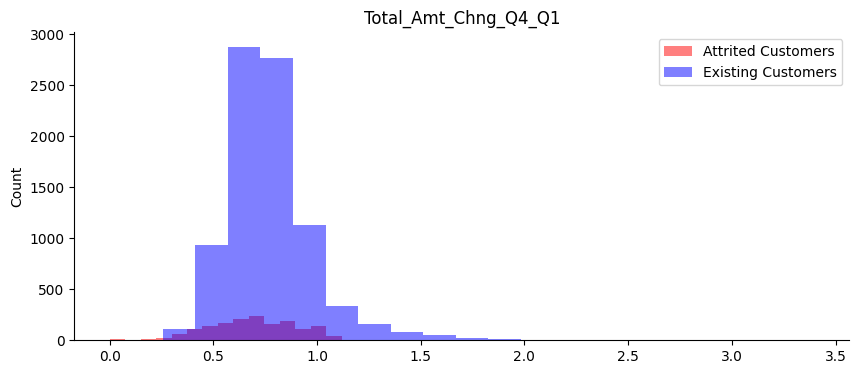

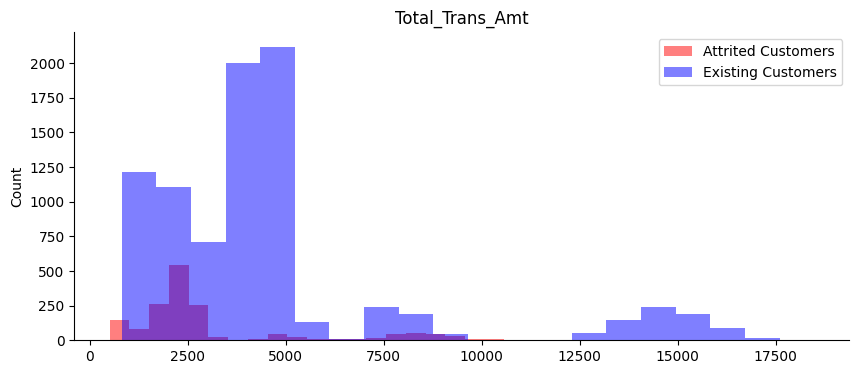

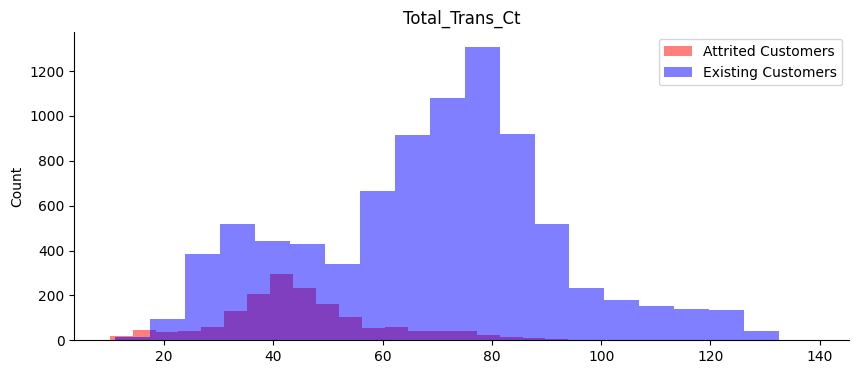

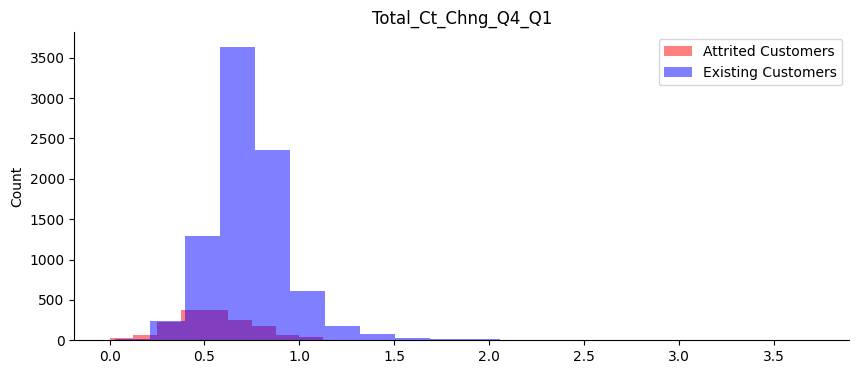

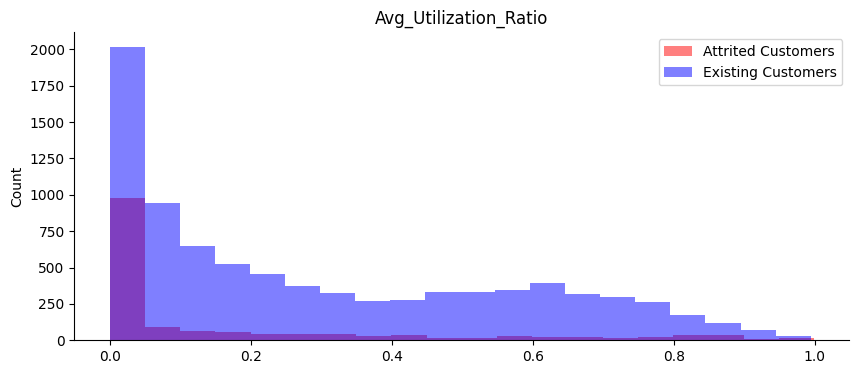

In [19]:
for numerical_col in df[numerical_vars]:
    plt.figure(figsize=(10, 4))
    df[df['Attrition_Flag'] == 'Attrited Customer'][numerical_col].plot(kind='hist', bins=20, title=numerical_col, alpha=0.5, color='red', label='Attrited Customers')
    df[df['Attrition_Flag'] == 'Existing Customer'][numerical_col].plot(kind='hist', bins=20, alpha=0.5, color='blue', label='Existing Customers')
    plt.legend()
    plt.gca().spines[['top', 'right']].set_visible(False)
    plt.ylabel('Count')
    plt.show()

## 3. Data Preprocessing

### Outlier Detection

* The z-score method wil be used to detect outliers in the numerical columns for each row in the whole dataset.

In [20]:
df_orig = df.copy()
for col in numerical_vars:
    z_scores = stats.zscore(df[col])
    abs_z_scores = abs(z_scores)
    threshold = 3
    outliers = df[(abs_z_scores > threshold)]
    df = df.drop(outliers.index)

In [21]:
print("After removing {} outliers, the dataset remained with {}".format(len(df_orig)-len(df), len(df)))

After removing 810 outliers, the dataset remained with 9317


### Dataset Split

* The dataset is split into training and testing sets, with 70% of the data allocated for training.
* To mitigate the risk of introducing bias or overfitting, **the dataset will be utilized in its original unbalanced form, without employing resampling techniques.** This approach corroborates with the use of **stratified cross-validation to mantain the proportion of churned customers in both datasets.**
* '**ROC-AUC' was chosen as the scoring method** for its ability to **assess model performance on imbalanced datasets and prioritize the reduction of false positive cases.**

In [22]:
x = df.drop(['Attrition_Flag'], axis=1)
y = df['Attrition_Flag']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, shuffle=True, random_state=42, stratify=y)

#Parameter for the cross validation model
scoring = 'roc_auc'
num_particoes = 10
kfold = StratifiedKFold(n_splits=num_particoes, shuffle=True, random_state=42)

In [23]:
print("The training dataset contains {} samples, while the testing dataset contains {} samples".format(x_train.shape[0], x_test.shape[0]))

The training dataset contains 6521 samples, while the testing dataset contains 2796 samples


### Encoding process

- Performing the encoding process separately for both the train and test datasets to avoid data leakeage.

In [24]:
encoder = TargetEncoder(cols=categorical_vars)
y_encoder = LabelEncoder()

y_train_encoded = y_encoder.fit_transform(y_train)
y_test_encoded = y_encoder.fit_transform(y_test)
x_train_encoded = encoder.fit_transform(x_train,y_train_encoded)
x_test_encoded = encoder.transform(x_test)

## 4. Models Training and Evaluation

### Specifying models and their parameters


* In order to test various models and understand their performance, **we will initially train 11 different algorithms and then select the top-performing ones** for further optimization.

In [25]:
#Models parameters
np.random.seed(42)
num_trees = 100
max_features = 5

# Establishing base parameters for the Bagging Classifier.
base = (DecisionTreeClassifier())

#Models
reg_log = ('LR', LogisticRegression(max_iter=600))
kmn = ('KNN', KNeighborsClassifier())
naive_bayes = ('NB', GaussianNB())
svm = ('SVM', SVC())
d_tree = ('DTree', DecisionTreeClassifier())
bagging = ('Bag', BaggingClassifier(estimator=base, n_estimators=num_trees))
random_forest = ('RFO', RandomForestClassifier(n_estimators=num_trees, max_features=max_features))
extra_trees = ('ETree', ExtraTreesClassifier(n_estimators=num_trees, max_features=max_features))
adaboost = ('Ada', AdaBoostClassifier(n_estimators=num_trees))
xgb = ('XGB', XGBClassifier())
gradient_boosting = ('GB', GradientBoostingClassifier(n_estimators=num_trees))


### 1st Model Training - Without using Pipeline

In [26]:
# Creating a list for the models
models = []
models.append(reg_log)
models.append(kmn)
models.append(d_tree)
models.append(naive_bayes)
models.append(svm)
models.append(xgb)

# Creating ensembles and adding them to the models list
models.append(bagging)
models.append(random_forest)
models.append(extra_trees)
models.append(adaboost)
models.append(gradient_boosting)

# Listas para armazenar os resultados
results = []
names = []

# Avaliação dos modelos
for name, model in models:
    cv_results = cross_val_score(model,x_train_encoded, y_train_encoded, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %.3f (%.3f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.909 (0.014)
KNN: 0.878 (0.015)
DTree: 0.882 (0.013)
NB: 0.882 (0.019)
SVM: 0.820 (0.026)
XGB: 0.991 (0.003)
Bag: 0.982 (0.008)
RFO: 0.988 (0.005)
ETree: 0.983 (0.005)
Ada: 0.982 (0.006)
GB: 0.988 (0.005)


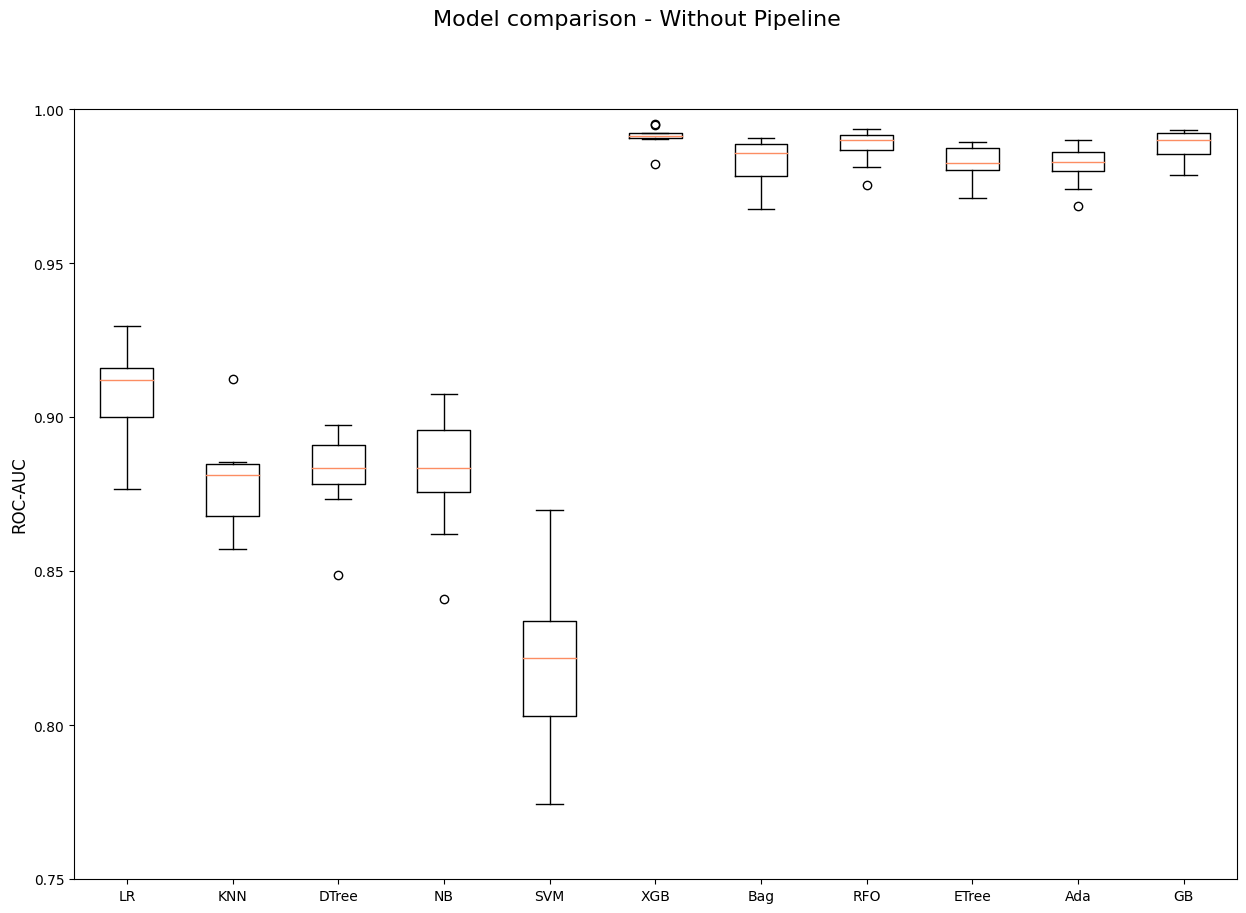

In [27]:
fig = plt.figure(figsize=(15,10))
fig.suptitle('Model comparison - Without Pipeline', fontsize=16)
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
ax.set_ylabel('ROC-AUC', fontsize=12)
ax.set_ylim(0.75, 1.0)
plt.show()

* It's noticeable that the **top 6 performing models for this dataset were: XGBoost (XGB), Bagging Classifier (Bag), Random Forest (RFO), Extra Trees (ETree), AdaBoost (Ada), and Gradient Boosting (GB)**. Now, it's necessary to understand if normalization and standardization process could further improve the results

### 2nd Model Training - Using Pipeline (Normalization and Standardization)

In [28]:
#Scaler
standard_scaler = ('StandardScaler', StandardScaler())
min_max_scaler = ('MinMaxScaler', MinMaxScaler())

In [29]:
pipelines = []
results = []
names = []

# Dataset standardized
pipelines.append(('XGB-std', Pipeline([standard_scaler, xgb])))
pipelines.append(('Bag-std', Pipeline([standard_scaler, bagging])))
pipelines.append(('RF-std', Pipeline([standard_scaler, random_forest])))
pipelines.append(('ET-std', Pipeline([standard_scaler, extra_trees])))
pipelines.append(('Ada-std', Pipeline([standard_scaler, adaboost])))
pipelines.append(('GB-std', Pipeline([standard_scaler, gradient_boosting])))

# Dataset Normalized
pipelines.append(('XGB-norm', Pipeline([min_max_scaler, xgb])))
pipelines.append(('Bag-norm', Pipeline([min_max_scaler, bagging])))
pipelines.append(('RF-norm', Pipeline([min_max_scaler, random_forest])))
pipelines.append(('ET-norm', Pipeline([min_max_scaler, extra_trees])))
pipelines.append(('Ada-norm', Pipeline([min_max_scaler, adaboost])))
pipelines.append(('GB-norm', Pipeline([min_max_scaler, gradient_boosting])))


for name, model in pipelines:
    cv_results = cross_val_score(model, x_train_encoded, y_train_encoded, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %.3f (%.3f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)


XGB-std: 0.991 (0.003)
Bag-std: 0.982 (0.008)
RF-std: 0.988 (0.005)
ET-std: 0.983 (0.006)
Ada-std: 0.982 (0.006)
GB-std: 0.988 (0.005)
XGB-norm: 0.991 (0.003)
Bag-norm: 0.982 (0.007)
RF-norm: 0.988 (0.006)
ET-norm: 0.982 (0.005)
Ada-norm: 0.982 (0.006)
GB-norm: 0.988 (0.005)


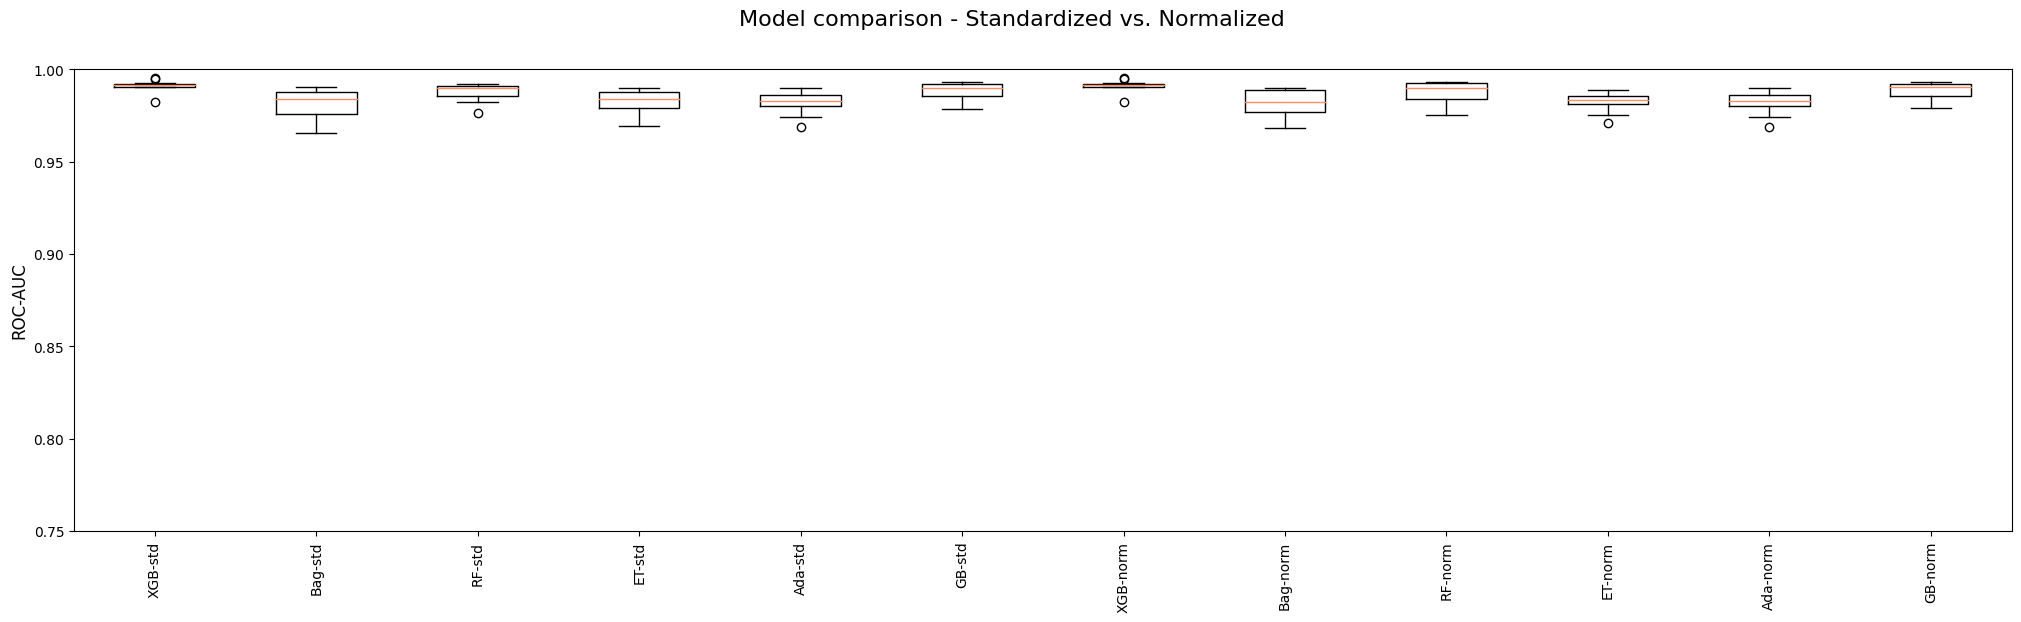

In [30]:
fig = plt.figure(figsize=(25,6))
fig.suptitle('Model comparison - Standardized vs. Normalized', fontsize=16)
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names, rotation=90)
ax.set_ylabel('ROC-AUC', fontsize=12)
ax.set_ylim(0.75, 1.0)
plt.show()

* The top 3 best models were XGBoost (XGB), Random Forest (RF) and Gradient Boosting (GB). Overall, the results were very similar between standardized and normalized data, with **XGB std/norm achieving the best and same performance in both pipelines process.**

### Feature selection

In [31]:
best_features = SelectKBest(score_func=f_classif, k=8)
fit = best_features.fit(x_train_encoded, y_train_encoded)
x_train_reduced = fit.transform(x_train_encoded)

best_col = best_features.get_feature_names_out(input_features=df.columns[1:21])

print('\n Nº of Original features:', x_train_encoded.shape[1])
print('\n Nº of Reduced fetaures:', x_train_reduced.shape[1])


print("\n Original features:", df.columns[1:21])
np.set_printoptions(precision=3)

print("\nScores of the original features:", fit.scores_)
print("\nReduced fetaures:", best_col  )


 Nº of Original features: 19

 Nº of Reduced fetaures: 8

 Original features: Index(['Customer_Age', 'Gender', 'Dependent_count', 'Education_Level',
       'Marital_Status', 'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'],
      dtype='object')

Scores of the original features: [2.345e-03 8.304e+00 1.852e+00 1.329e+01 1.063e+00 8.810e+00 2.309e+00
 3.279e-02 1.733e+02 1.923e+02 2.081e+02 2.635e+00 4.766e+02 9.053e-02
 1.038e+02 1.873e+02 1.209e+03 7.652e+02 2.351e+02]

Reduced fetaures: ['Total_Relationship_Count' 'Months_Inactive_12_mon'
 'Contacts_Count_12_mon' 'Total_Revolving_Bal' 'Total_Trans_Amt'
 'Total_Trans_Ct' 'Total_Ct_Chng_Q4_Q1' 'Avg_Utilization_Ratio']


In [32]:
x_train_reduced = x_train_encoded[best_col]

pipelines_bf = []
results_bf = []
names_bf = []

# Dataset Normalized
pipelines_bf.append(('XGB-norm', Pipeline([min_max_scaler, xgb])))
pipelines_bf.append(('RF-norm', Pipeline([min_max_scaler, random_forest])))
pipelines_bf.append(('GB-norm', Pipeline([min_max_scaler, gradient_boosting])))

# Executando os pipelines
for name, model in pipelines_bf:
    cv_results = cross_val_score(model, x_train_reduced, y_train_encoded, cv=kfold, scoring=scoring)
    results_bf.append(cv_results)
    names_bf.append(name)
    msg = "%s: %.3f (%.3f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

XGB-norm: 0.984 (0.003)
RF-norm: 0.982 (0.005)
GB-norm: 0.983 (0.005)


* **Feature selection did not result in improved model accuracy.** Therefore, the model performs better when using all features

### Testing Top 3 Models

In [45]:
xgb = XGBClassifier()
rf = RandomForestClassifier(n_estimators=num_trees, max_features=max_features)
gb = GradientBoostingClassifier(n_estimators=num_trees)

def model_comp(model, X_train, y_train, X_test, y_test):

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    fold = StratifiedKFold(n_splits = num_particoes, shuffle = True, random_state = 0)
    score = cross_val_score(model, x_train, y_train, cv = kfold, scoring = scoring)
    print("Score Cross Validation: {:.2%}".format(score.mean()))
    print(f"Average Precision: {average_precision_score(y_test, y_pred):.2%}")
    print(f"Precision Score: {precision_score(y_test, y_pred):.2%}")
    print(f"Recall Score: {recall_score(y_test, y_pred):.2%}")
    print(f"F1 Score: {f1_score(y_test, y_pred):.2%}")
    print(f"ROC AUC Score: {roc_auc_score(y_test, y_pred):.2%}")


In [34]:
model_comp(xgb, x_train_encoded, y_train_encoded, x_test_encoded, y_test_encoded)

Score Cross Validation: 99.10%
Average Precision: 97.17%
Precision Score: 97.34%
Recall Score: 98.76%
F1 Score: 98.04%
ROC AUC Score: 92.55%


In [35]:
model_comp(rf, x_train_encoded, y_train_encoded, x_test_encoded, y_test_encoded)

Score Cross Validation: 98.81%
Average Precision: 97.03%
Precision Score: 97.21%
Recall Score: 98.63%
F1 Score: 97.92%
ROC AUC Score: 92.16%


In [36]:
model_comp(gb, x_train_encoded, y_train_encoded, x_test_encoded, y_test_encoded)

Score Cross Validation: 98.81%
Average Precision: 97.04%
Precision Score: 97.22%
Recall Score: 98.72%
F1 Score: 97.96%
ROC AUC Score: 92.20%


* Although the top three models exhibited similar performance across various metrics, **XGBoost (XGB) outperformed the others in terms of precision and ROC metrics.** Given our objective to accurately identify customers at high risk of churning, **minimizing false positive cases is crucial.**

## 5. Hyperparameter Tunning

In [43]:
pipelines_HT = []

pipelines_HT.append(('XGB-orig', Pipeline(steps=[xgb])))
pipelines_HT.append(('XGB-stand', Pipeline(steps=[standard_scaler,xgb])))
pipelines_HT.append(('XGB-norm', Pipeline(steps=[min_max_scaler,xgb])))

param_grid = {
 'max_depth': range(6,10,2),
 'min_child_weight': range(1,6,2)
}

for name, model in pipelines_HT:
    grid = GridSearchCV(estimator=XGBClassifier( learning_rate =0.1, n_estimators=140, max_depth=5,
                        min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
                        objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27),
                        param_grid = param_grid, scoring=scoring,n_jobs=4, cv=kfold)
    grid.fit(x_train_encoded, y_train_encoded) #Fixing certain parameters to allow flexibility in altering the param_grid
    print(" %s - Best: %f using %s" % (name, grid.best_score_, grid.best_params_))




 XGB-orig - Best: 0.992454 using {'max_depth': 6, 'min_child_weight': 1}
 XGB-stand - Best: 0.992454 using {'max_depth': 6, 'min_child_weight': 1}
 XGB-norm - Best: 0.992454 using {'max_depth': 6, 'min_child_weight': 1}



* In XGBoost models, the parameters max_depth and min_child_weight typically have the most significant impact on the model's performance. Therefore, we prioritized tuning them first. However, since **the ideal value for min_child_weight was determined to be 1 (the lowest possible value)**, we will explore tuning another parameter.

In [38]:
param_grid2 = {
 'max_depth': [5,6,7],
 'n_estimators': [100, 200, 300]
}

# Prepara e executa o GridSearchCV
for name, model in pipelines_HT:
    grid = GridSearchCV(estimator=XGBClassifier( learning_rate =0.1,
                        min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
                        objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27),
                        param_grid = param_grid2, scoring=scoring,n_jobs=4, cv=kfold)
    grid.fit(x_train_encoded, y_train_encoded)
    print(" %s - Best: %f using %s" % (name, grid.best_score_, grid.best_params_))

 XGB-orig - Melhor: 0.992900 usando {'max_depth': 5, 'n_estimators': 200}
 XGB-stand - Melhor: 0.992900 usando {'max_depth': 5, 'n_estimators': 200}
 XGB-norm - Melhor: 0.992900 usando {'max_depth': 5, 'n_estimators': 200}


* When **we increase the number of estimators and narrow down the range for the max_depth parameter, the model's accuracy has a slighty improve.**

## 6. Final Test Evaluation

* For the final test evaluation, we will compile all the tests conducted previously. **Thus, taking into account the XGBoost (XGB) model with tuned hyperparameters (number of estimators, max_depth, and minimum child weight), utilizing all features, and without using standardized data (as it did not alter the overall result)**. We can examine the results below:

In [39]:
# Final model with tuned Hyperparameter
xgb_final = XGBClassifier(learning_rate =0.1, n_estimators=300, max_depth=5,
                            min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
                            nthread=4, scale_pos_weight=1, seed=27)

model_comp(xgb_final, x_train_encoded , y_train_encoded, x_test_encoded, y_test_encoded)

Score Cross Validation: 99.28%
Average Precision: 97.42%
Precision Score: 97.59%
Recall Score: 98.80%
F1 Score: 98.19%
ROC AUC Score: 93.22%


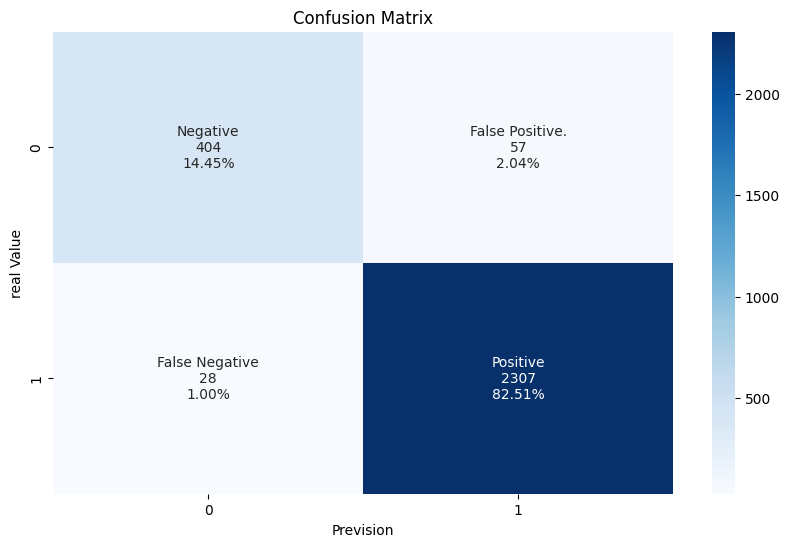

In [42]:
xgb_final.fit(x_train_encoded, y_train_encoded)
y_pred = xgb_final.predict(x_test_encoded)

conf_matrix = confusion_matrix(y_test_encoded, y_pred)

plt.figure(figsize=(10, 6))
nomes = ['Negative','False Positive.','False Negative','Positive']
counts = [value for value in conf_matrix.flatten()]
porcentagens = ['{0:.2%}'.format(value) for value in conf_matrix.flatten()/np.sum(conf_matrix)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(nomes, counts, porcentagens)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(conf_matrix, annot=labels, cmap="Blues", fmt='', cbar=True)
plt.title("Confusion Matrix")
plt.xlabel("Prevision")
plt.ylabel("Real Value")
plt.show()


## > Results

- The top-performing algorithms in this study were XGBoost, Random Forest, and Gradient Boosting. However, XGBoost stood out as the best model in terms of ROC-AUC and precision. Specifically, **the XGBoost model with 300 estimators, a maximum depth of 5, and a minimum child weight of 1 demonstrated superior performance**. Also, **normalization, standardization, and feature selection did not improve the models' metrics**; therefore, these techniques were not used.
- These **metrics were prioritized because the primary objective of the project was to minimize false positives**, allowing the company to effectively communicate with customers who are considering canceling their service. Given that the churn rate in the dataset was nearly 17%, high results of accuracy were expected.
- **The model achieved good results on unseen data, with a ROC-AUC of 93.22% and a precision of 97.59%.** Overall, the model's performance was satisfactory across both training and testing datasets, suggesting that overfitting was not an issue.